___

<p style = "font-family:courier;font-size:25px;">
BR35H-MASK-RCNN      
</p>

<p style = "font-family:courier;font-size:15px;">
Capstone Phase 5 Project     
</p>

<b>Name:</b> Ansel Vallejo

<i><font color = 'gray'>Source: </font></i>
https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

___

#### <b> Overview </b>

<div style="text-align: justify">
In the medical field, Brain tumor is seen as a serious, abnormal growth of cells in or near the brain that can be either benign, which is non-cancerous or malignant, which is cancerous. There are many treatments an individual with such tumor can receive, such as radiation therapy, chemotherapy, therapeutic drug, etc. Brain tumor can be seen via Magnetic Resonance Imaging (MRI) scanned images. Human error is prone to occur in any industry, and because of such error in the medical field can cost a life. To detect and identify what constitutes a benign or malignant tumor without human intervention would be to build a robust deep learning model to help the medical practitioner properly classify a cancerous from noncancerous tumors using over 3000 MRI scan trained images and testing images to help better serve the model.
</div>

<b>Algorithm Implemented: </b> <i>Convolutional Neural Network</i> (Deep Learning) <br>
<b>Data type: </b> Unstructured <br>
<br>
<br>
<b>Data Classification: </b>
    <ul>
        <li><b>NO</b> (no tumor) - classified as 0</li>
        <li><b>YES</b> (yes tumor) - classified as 1</li>
    </ul>


___

### Import Libraries

In [99]:
import pandas as pd                       #Data Analysis and manipulation tool
import numpy as np                        #Scientific computing
import matplotlib.pyplot as plt           #Visualization
import tensorflow as tf
import seaborn as sns
%matplotlib inline

#Import image data
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from PIL import Image
import random
import pickle
import cv2
import os

#SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#KERAS
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

                                                Number of GPUs Available

In [52]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


___

### Import Data

<b> Defining path folder for the train data </b>

In [154]:
#Folder name of the images
no_tumor_folder = 'no/'
yes_tumor_folder = 'yes/'
pred_tumor_folder = 'pred/'

<b> List Dir </b> <i><font color = 'gray'>(Function)</font></i> <br>
Returns a list of files in the directory mentioned

In [155]:
#Function that displays the image list directory
def list_dir(path):
    img_list = os.listdir(path)
    return img_list

In [151]:
#import cv2

#Empty list to store images and labels
data = []

#Folder category found in data folder
directory = "data/"
categories = ["no", "yes"]
IMG_SIZE = 224

#Function that loads the image data, categorizes images, resize, shuffles, and creates image and label lists
def load_data():
    for classification in categories:
        path = os.path.join(directory, classification)
        cat_num = categories.index(classification)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, cat_num])
            except Exception as e:
                pass
        random.shuffle(data)


    image = []
    label = []   
    for images, labels in data:
        image.append(images)
        label.append(labels)
        
    image = np.array(image).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    
    return image, label


image, label = load_data()
    


___

<b> Saving image and label files to a pickle file </b>

In [127]:
pickle_out = open('image.pickle', 'wb')
pickle.dump(image, pickle_out)
pickle_out.close()
    
pickle_out = open('label.pickle', 'wb')
pickle.dump(label, pickle_out)
pickle_out.close()

In [128]:
pickle_in = open('image.pickle', 'rb')
image = pickle.load(pickle_in)

___

<i> <font color = 'blue'> TESTING pickle_in </font> </i>

In [129]:
image[1]

array([[[254],
        [ 78],
        [111],
        ...,
        [117],
        [117],
        [255]],

       [[197],
        [  0],
        [ 13],
        ...,
        [  3],
        [  3],
        [254]],

       [[228],
        [ 10],
        [ 10],
        ...,
        [  8],
        [  8],
        [254]],

       ...,

       [[247],
        [  0],
        [ 11],
        ...,
        [  0],
        [ 16],
        [254]],

       [[216],
        [ 12],
        [  0],
        ...,
        [ 19],
        [ 11],
        [254]],

       [[255],
        [254],
        [254],
        ...,
        [254],
        [254],
        [255]]], dtype=uint8)

___

In [63]:
###################################### SCRAP CODE #######################################################
###################################### SCRAP CODE #######################################################

#import cv2

#Folder category found in data folder
# directory = "data/"
# categories = ["no", "yes"]

# def load_data(path, folder):
#     for classification in categories:
#         path = os.path.join(path, classification)
#         cat_num = categories.index(classification)
#         for img in os.listdir(path):
#             img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
#             plt.imshow(img_array, cmap = 'gray')
#             plt.show()
#             break
#         break



# print(len(data))

# for sample in data:
#     print(sample[1])
    
    
# for images, labels in data:
#     image.append(images)
#     label.append(labels)
        
# image = np.array(image).reshape(-1, IMG_SIZE, IMG_SIZE, 1)



# fig, axs = plt.subplots(5, 5)

# directory = "data/"
# categories = ["no", "yes"]
# IMG_SIZE = 64

# for i in range(len(axs)):
#     for j in range(len(axs[i])):
#         new_array = cv2.resize(image[i*len(axs[i])+j], (IMG_SIZE, IMG_SIZE))
#         axs[i][j].imshow(new_array, cmap='gray')
#         axs[i][j].set_title(categories[label[i*len(axs[i])+j]])
#         axs[i][j].set_xticks([])
#         axs[i][j].set_yticks([])

# plt.tight_layout()
# plt.show()


###################################### SCRAP CODE #######################################################
###################################### SCRAP CODE #######################################################

In [ ]:
# load_data(directory, categories)

<font size = '4'> <b> DISPLAY IMAGE BY IMAGE SIZE </b></font>

<b><i> <font color = 'purple'> (1 x 3) </font> </i></b>

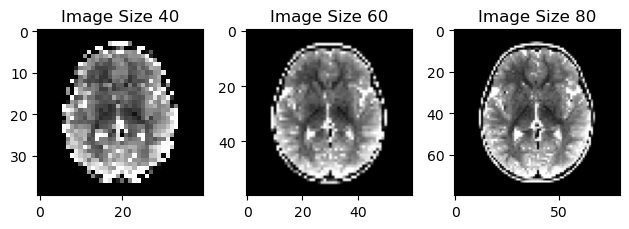

In [152]:
fig, axs = plt.subplots(1, 3)

IMG_SIZE = 40

for i in range(len(axs)):
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    axs[i].imshow(new_array, cmap='gray')
    axs[i].set_title(f'Image Size {IMG_SIZE}')
    IMG_SIZE += 20

plt.tight_layout()
plt.show()

<b><i> <font color = 'purple'> (3 x 3) </font> </i></b>

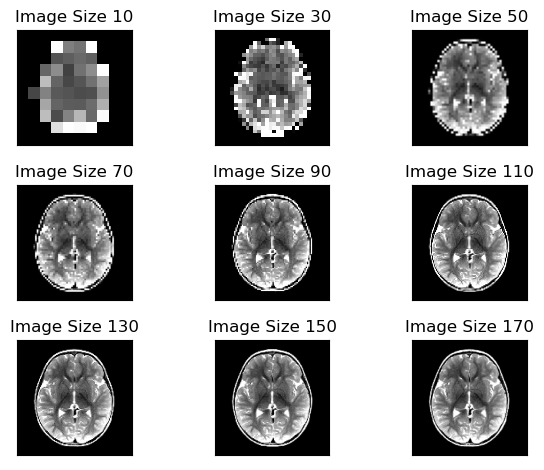

In [148]:
fig, axs = plt.subplots(3, 3)

IMG_SIZE = 10

for i in range(len(axs)):
    for j in range(len(axs)):
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        axs[i, j].imshow(new_array, cmap='gray')
        axs[i, j].set_title(f'Image Size {IMG_SIZE}')
        IMG_SIZE += 20

for ax in axs.flat:
    ax.set(xticks=[], yticks=[])
        
plt.tight_layout()
plt.show()

___

##### <b> Create a DataFrame</b> <i><font color = 'gray'> for YES, NO, and Pred</font></i><br> 
Contains the path of the images, and the label classification.

Display the images in the directory

In [283]:
# no_tumor_list = list_dir(no_tumor)
# no_tumor_list[0] = no_tumor_folder + no_tumor_list[0]
# print(no_tumor_list[0])

# yes_tumor_list = list_dir(yes_tumor)
# yes_tumor_list[0] = yes_tumor_folder + yes_tumor_list[0]
# print(yes_tumor_list[0])

# pred_tumor_list = list_dir(pred_tumor)
# pred_tumor_list[0] = pred_tumor_folder + pred_tumor_list[0]
# print(pred_tumor_list[0])

no/no0.jpg


                                                NO (no tumor) DataFrame

In [185]:
no_tumor_df = pd.DataFrame()

In [284]:
no_tumor_list = list_dir(no_tumor_folder)

for i in range(len(no_tumor_list)):
    no_tumor_list[i] = no_tumor_folder + no_tumor_list[i]

no_tumor_df['path'] = no_tumor_list
no_tumor_df['image'] = list_dir(no_tumor_folder)
no_tumor_df['label'] = [0]*len(no_tumor_df['image'])

In [285]:
no_tumor_df.head()

image  label           path
0     no0.jpg      0     no/no0.jpg
1     no1.jpg      0     no/no1.jpg
2    no10.jpg      0    no/no10.jpg
3   no100.jpg      0   no/no100.jpg
4  no1000.jpg      0  no/no1000.jpg

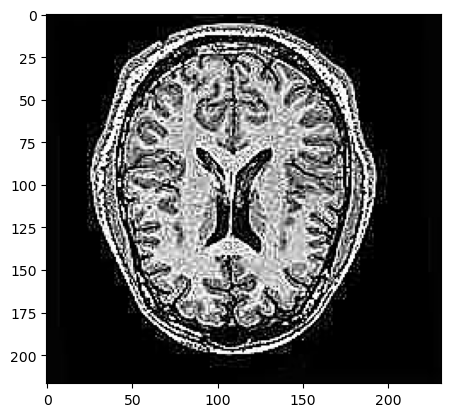

In [290]:
no_img = cv2.imread(os.path.join(no_tumor_df['path'][3]))
no_img.shape

plt.imshow(cv2.cvtColor(no_img, cv2.COLOR_BGR2RGB))

___

                                                YES (yes tumor) DataFrame

In [192]:
yes_tumor_df = pd.DataFrame()

In [286]:
yes_tumor_list = list_dir(yes_tumor_folder)

for i in range(len(yes_tumor_list)):
    yes_tumor_list[i] = yes_tumor_folder + yes_tumor_list[i]

yes_tumor_df['path'] = yes_tumor_list
yes_tumor_df['image'] = list_dir(yes_tumor_folder)
yes_tumor_df['label'] = [1]*len(yes_tumor_df['image'])

In [287]:
yes_tumor_df.head()

image  label           path
0     y0.jpg      1     yes/y0.jpg
1     y1.jpg      1     yes/y1.jpg
2    y10.jpg      1    yes/y10.jpg
3   y100.jpg      1   yes/y100.jpg
4  y1000.jpg      1  yes/y1000.jpg

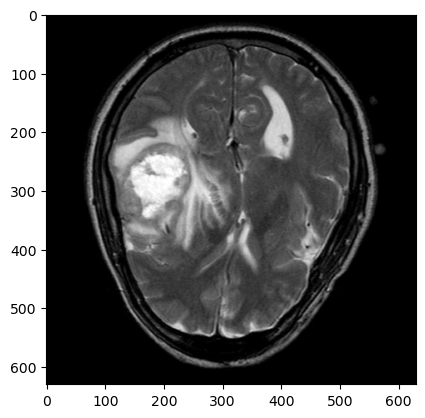

In [289]:
yes_img = cv2.imread(os.path.join(yes_tumor_df['path'][3]))
yes_img.shape

plt.imshow(cv2.cvtColor(yes_img, cv2.COLOR_BGR2RGB))

___

                                                Pred (pred tumor) DataFrame

In [197]:
pred_tumor_df = pd.DataFrame()

In [203]:
pred_tumor_list = list_dir(pred_tumor_folder)

for i in range(len(pred_tumor_list)):
    pred_tumor_list[i] = pred_tumor_folder + pred_tumor_list[i]

pred_tumor_df['image'] = pred_tumor_list
pred_tumor_df['label'] = None



In [204]:
pred_tumor_df.head()

image label
0   pred/pred0.jpg  None
1   pred/pred1.jpg  None
2  pred/pred10.jpg  None
3  pred/pred11.jpg  None
4  pred/pred12.jpg  None

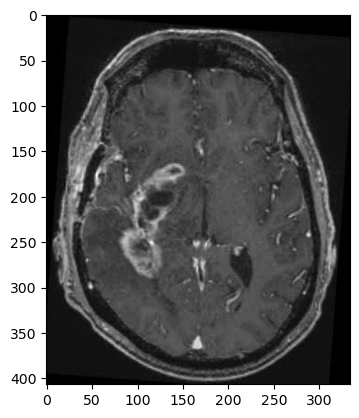

In [280]:
pred_img = cv2.imread(os.path.join(pred_tumor_df['image'][3]))
pred_img.shape

plt.imshow(cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB))

___

<b>Concatenate DataFrame</b> <i><font color = 'gray'> YES and NO DataFrames </font></i><br>
We will combine and shuffle the DataFrames

In [292]:
df_to_concat = [no_tumor_df, yes_tumor_df]

yes_no_df = pd.concat(df_to_concat, ignore_index=True)
yes_no_df = yes_no_df.sample(frac = 1).reset_index(drop=True)

yes_no_df= yes_no_df.applymap(lambda s: s.lower() if type(s) == str else s)
yes_no_df.head()

image  label           path
0    y289.jpg      1   yes/y289.jpg
1   no758.jpg      0   no/no758.jpg
2   y1138.jpg      1  yes/y1138.jpg
3  no1382.jpg      0  no/no1382.jpg
4    y299.jpg      1   yes/y299.jpg

In [246]:
yes_no_df

image  label
0      y1304.jpg      1
1      no876.jpg      0
2      no803.jpg      0
3      y1022.jpg      1
4      no745.jpg      0
...          ...    ...
2995  no1350.jpg      0
2996   no949.jpg      0
2997  no1170.jpg      0
2998   no449.jpg      0
2999    y315.jpg      1

[3000 rows x 2 columns]

___

Display the yes_tumor images in the directory

In [75]:
list_dir(yes_tumor)

['y0.jpg',
 'y1.jpg',
 'y10.jpg',
 'y100.jpg',
 'y1000.jpg',
 'y1001.jpg',
 'y1002.jpg',
 'y1003.jpg',
 'y1004.jpg',
 'y1005.jpg',
 'y1006.jpg',
 'y1007.jpg',
 'y1008.jpg',
 'y1009.jpg',
 'y101.jpg',
 'y1010.jpg',
 'y1011.jpg',
 'y1012.jpg',
 'y1013.jpg',
 'y1014.jpg',
 'y1015.jpg',
 'y1016.jpg',
 'y1017.jpg',
 'y1018.jpg',
 'y1019.jpg',
 'y102.jpg',
 'y1020.jpg',
 'y1021.jpg',
 'y1022.jpg',
 'y1023.jpg',
 'y1024.jpg',
 'y1025.jpg',
 'y1026.jpg',
 'y1027.jpg',
 'y1028.jpg',
 'y1029.jpg',
 'y103.jpg',
 'y1030.jpg',
 'y1031.jpg',
 'y1032.jpg',
 'y1033.jpg',
 'y1034.jpg',
 'y1035.jpg',
 'y1036.jpg',
 'y1037.jpg',
 'y1038.jpg',
 'y1039.jpg',
 'y104.jpg',
 'y1040.jpg',
 'y1041.jpg',
 'y1042.jpg',
 'y1043.jpg',
 'y1044.jpg',
 'y1045.jpg',
 'y1046.jpg',
 'y1047.jpg',
 'y1048.jpg',
 'y1049.jpg',
 'y105.jpg',
 'y1050.jpg',
 'y1051.jpg',
 'y1052.jpg',
 'y1053.jpg',
 'y1054.jpg',
 'y1055.jpg',
 'y1056.jpg',
 'y1057.jpg',
 'y1058.jpg',
 'y1059.jpg',
 'y106.jpg',
 'y1060.jpg',
 'y1061.jpg',
 'y1062

Display the pred_tumor images in the directory

In [76]:
list_dir(pred_tumor)

['pred0.jpg',
 'pred1.jpg',
 'pred10.jpg',
 'pred11.jpg',
 'pred12.jpg',
 'pred13.jpg',
 'pred14.jpg',
 'pred15.jpg',
 'pred16.jpg',
 'pred17.jpg',
 'pred18.jpg',
 'pred19.jpg',
 'pred2.jpg',
 'pred20.jpg',
 'pred21.jpg',
 'pred22.jpg',
 'pred23.jpg',
 'pred24.jpg',
 'pred25.jpg',
 'pred26.jpg',
 'pred27.jpg',
 'pred28.jpg',
 'pred29.jpg',
 'pred3.jpg',
 'pred30.jpg',
 'pred31.jpg',
 'pred32.jpg',
 'pred33.jpg',
 'pred34.jpg',
 'pred35.jpg',
 'pred36.jpg',
 'pred37.jpg',
 'pred38.jpg',
 'pred39.jpg',
 'pred4.jpg',
 'pred40.jpg',
 'pred41.jpg',
 'pred42.jpg',
 'pred43.jpg',
 'pred44.jpg',
 'pred45.jpg',
 'pred46.jpg',
 'pred47.jpg',
 'pred48.jpg',
 'pred49.jpg',
 'pred5.jpg',
 'pred50.jpg',
 'pred51.jpg',
 'pred52.jpg',
 'pred53.jpg',
 'pred54.jpg',
 'pred55.jpg',
 'pred56.jpg',
 'pred57.jpg',
 'pred58.jpg',
 'pred59.jpg',
 'pred6.jpg',
 'pred7.jpg',
 'pred8.jpg',
 'pred9.jpg']

In [268]:
yes_no_df[['image']].values

array([['y1304.jpg'],
       ['no876.jpg'],
       ['no803.jpg'],
       ...,
       ['no1170.jpg'],
       ['no449.jpg'],
       ['y315.jpg']], dtype=object)

In [272]:
dataset2 = []
label2 = []
INPUT_SIZE = 64

#for index, image_name in enumerate(yes_no_df):
 #   if(image_name.split('.')[1]=='jpg'):
# image=cv2.imread(str(yes_no_df['image']))
# image=Image.fromarray(image, 'RGB')
# image = image.resize((INPUT_SIZE,INPUT_SIZE))
# dataset2.append(np.array(image))
# label2.append(0)
        
        
for image_name in range(len(yes_no_df['image'])):
     if(image_name.split('.')[1]=='jpg'):
         image=cv2.imread(yes_tumor + img_dir + image_name)
         image=Image.fromarray(image, 'RGB')
         image = image.resize((INPUT_SIZE,INPUT_SIZE))
         dataset2.append(np.array(image))
         label2.append(1)
        
dataset = np.array(dataset)
label = np.array(label)

AttributeError: 'int' object has no attribute 'split'

___

#### Train Test Split

In [211]:
X_train, X_test, y_train, y_test = train_test_split(yes_no_df['image'], 
                                                    yes_no_df['label'], 
                                                    test_size=0.20, 
                                                    random_state = 42)

In [159]:
dataset = []
label = []
INPUT_SIZE = 64

for index, image_name in enumerate(list_dir(no_tumor_folder)):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(no_tumor_folder + image_name)
        image=Image.fromarray(image, 'RGB')
        image = image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)
        
        
for index, image_name in enumerate(list_dir(yes_tumor_folder)):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(yes_tumor_folder +  image_name)
        image=Image.fromarray(image, 'RGB')
        image = image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)
        
dataset = np.array(dataset)
label = np.array(label)

In [163]:
dataset.shape
label.shape

(3000,)

In [103]:
print(label[2433])

1


In [295]:
list(yes_no_df['path'])[1]


'no/no758.jpg'

pandas.core.series.Series

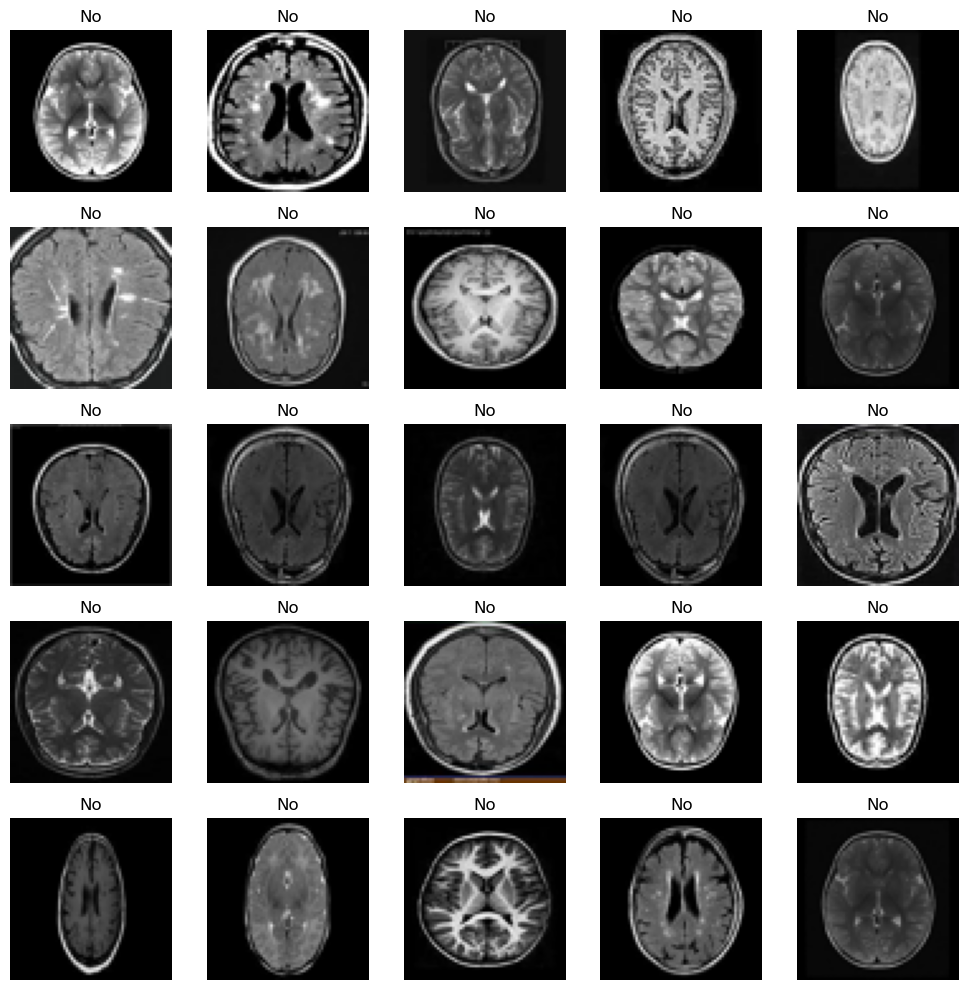

In [300]:
label_category = list(map(lambda x: 'No' if x == 0 else 'Yes', label))
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))


for i in range(5):
    for j in range(5):
        axs[i][j].imshow(dataset[i*5+j])
        axs[i][j].set_title(label_category[i*5+j])
        axs[i][j].axis('off')

plt.tight_layout()
plt.show()



In [301]:
X_train, X_test, y_train, y_test = train_test_split(dataset, 
                                                    label, 
                                                    test_size=0.20, 
                                                    random_state = 42)

In [302]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2400, 64, 64, 3)
(2400,)
(600, 64, 64, 3)
(600,)


In [303]:
X_train = normalize(x_train, axis =1)
X_test = normalize(X_test, axis =1)

<b> Sequential Model </b>

In [311]:
model = Sequential()

In [312]:
model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

# model.fit(X_train, y_train, batch_size = 16, 
#                            verbose=1, 
#                            epochs=10, 
#                            validation_data= (X_train, y_train),
#                            shuffle = False)

#model.save('brain_tumor_10_epochs.h5')

In [307]:
test_loss, test_acc = model.evaluate(X_test, y_test)

19/19 [==============================] - 1s 18ms/step - loss: 0.1065 - accuracy: 0.9733


In [308]:
print(test_acc)
print(test_loss)

0.9733333587646484
0.10646937042474747


In [309]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 activation_22 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 activation_23 (Activation)  (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                 

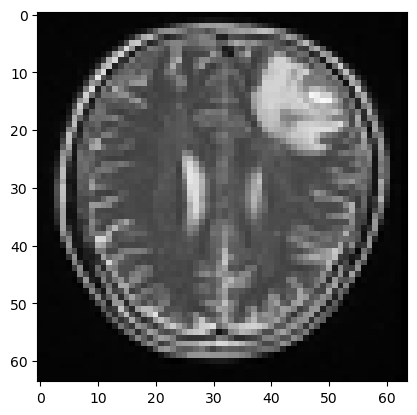

In [47]:
sample_img = X_train[0]

imgplot = plt.imshow(image)

In [48]:
sample_img.shape

(64, 64, 3)

In [313]:
results = model.fit(X_train, y_train, batch_size = 16, 
                            verbose=1, 
                            epochs=10, 
                            validation_data= (X_train, y_train),
                            shuffle = False)

Epoch 1/10
150/150 [==============================] - 8s 51ms/step - loss: 0.5564 - accuracy: 0.7254 - val_loss: 0.4605 - val_accuracy: 0.7937
Epoch 2/10
150/150 [==============================] - 7s 50ms/step - loss: 0.4364 - accuracy: 0.8062 - val_loss: 0.3499 - val_accuracy: 0.8483
Epoch 3/10
150/150 [==============================] - 8s 50ms/step - loss: 0.3236 - accuracy: 0.8629 - val_loss: 0.2784 - val_accuracy: 0.8804
Epoch 4/10
150/150 [==============================] - 8s 50ms/step - loss: 0.2458 - accuracy: 0.8979 - val_loss: 0.1701 - val_accuracy: 0.9396
Epoch 5/10
150/150 [==============================] - 8s 51ms/step - loss: 0.1810 - accuracy: 0.9325 - val_loss: 0.1317 - val_accuracy: 0.9542
Epoch 6/10
150/150 [==============================] - 8s 52ms/step - loss: 0.1337 - accuracy: 0.9467 - val_loss: 0.0787 - val_accuracy: 0.9717
Epoch 7/10
150/150 [==============================] - 8s 51ms/step - loss: 0.0927 - accuracy: 0.9688 - val_loss: 0.0509 - val_accuracy: 0.9825

In [69]:
results.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x1dbb9ef0070>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.55892014503479,
   0.4337441623210907,
   0.32272642850875854,
   0.24487942457199097,
   0.1602124720811844,
   0.11691224575042725,
   0.07528156787157059,
   0.050519198179244995,
   0.035206567496061325,
   0.03351113945245743],
  'accuracy': [0.7200000286102295,
   0.8162500262260437,
   0.8679166436195374,
   0.902916669845581,
   0.9383333325386047,
   0.9587500095367432,
   0.9787499904632568,
   0.987500011920929,
   0.9879166483879089,
   0.9879166483879089],
  'val_loss': [0.4955861270427704,
   0.36491626501083374,
   0.22926294803619385,
   0.15751050412654877,
   0.08003570884466171,
   0.06857942044734955,
   0.07561933994293213,
   0.025399621576070786,
   0.023645710200071335,
   0.012185433879494667],
  'val_accuracy': [0.7720833420753479,
   0.8333333134651184,
   0.9141666889190674,
   0.95333331

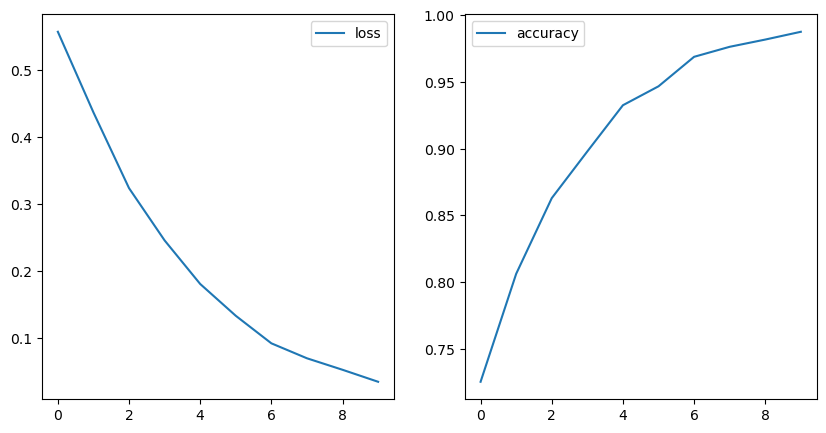

In [314]:
sigmoid_loss = results.history['loss']
sigmoid_accuracy = results.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results.epoch, y=sigmoid_loss, ax=ax1, label='loss')
sns.lineplot(x=results.epoch, y=sigmoid_accuracy, ax=ax2, label='accuracy');

### Evaluate Model

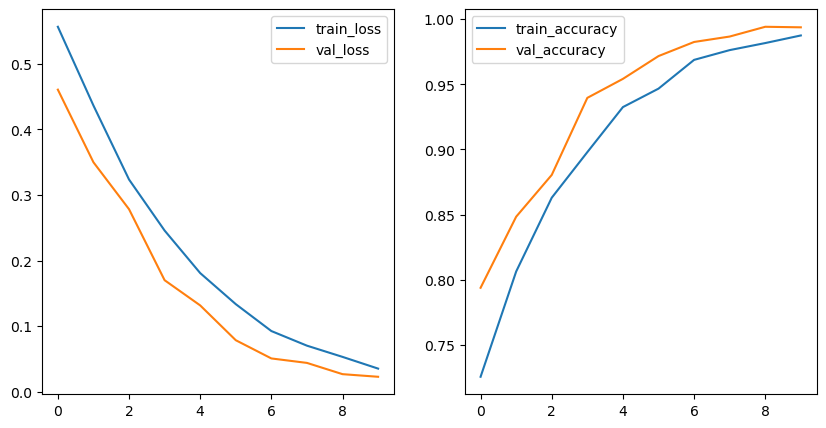

In [315]:
train_loss = results.history['loss']
train_acc = results.history['accuracy']
val_loss = results.history['val_loss']
val_acc = results.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=results.epoch, y=train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=results.epoch, y=val_acc, ax=ax2, label='val_accuracy');

In [143]:
pred_tumor_list = list_dir(pred_tumor)
for i in range(len(pred_tumor_list)):
    pred_tumor_list[i] = pred_tumor + img_dir + pred_tumor_list[i]

In [165]:
testing_predictions = model.predict(X_test)
#y_pred = model.predict(X_test)
print(classification_report(y_test,testing_predictions))


#print(y_pred)

19/19 [==============================] - 0s 15ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

<b> Get all the data in the directory data/validation (Train: 500 images) (Test: 100 images), and reshape them </b>

#### <b><font color = 'red'>LOAD THE DATA</font> </b>

In [340]:
df_list = list(yes_no_df['path'].astype(str))

In [317]:
def load_images_from_directory(train_dir):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

#     validation_generator = test_datagen.flow_from_directory(
#         val_dir,
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')

#     predict_generator = test_datagen.flow_from_directory(
#         pred_dir,
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode=None,
#         shuffle=False)

    return train_generator #, validation_generator, predict_generator

In [348]:
load_images_from_directory('data/')

Found 0 images belonging to 0 classes.


In [ ]:


train_img_dir = 'Br35H-Mask-RCNN/VAL/'
test_img_dir = 'Br35H-Mask-RCNN/TEST/'

In [82]:
train_generator = ImageDataGenerator().flow_from_directory(
    train_img_dir,
    target_size= (256, 256),
    batch_size = 500)

Found 0 images belonging to 0 classes.


In [83]:
test_generator = ImageDataGenerator().flow_from_directory(
    test_img_dir,
    target_size= (256, 256),
    batch_size = 100)

Found 0 images belonging to 0 classes.


In [35]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

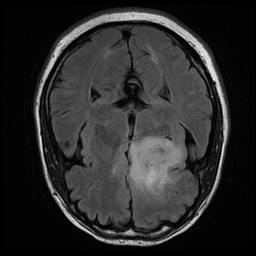

In [36]:
array_to_img(train_images[10])

<b> Transform the matrix </b>

Train

In [38]:
train_img_unrow = train_images.reshape(500, -1).T

In [39]:
np.shape(train_img_unrow)

(196608, 500)

Test

In [40]:
m = 100
test_img_unrow = test_images.reshape(m, -1).T

In [41]:
np.shape(test_img_unrow)

(196608, 100)

Class Indices

In [43]:
train_generator.class_indices

{'no': 0, 'yes': 1}

In [44]:
train_labels_final = train_labels.T[[1]]

In [45]:
np.shape(train_labels_final)

(1, 500)

In [46]:
test_labels_final = test_labels.T[[1]]

In [47]:
np.shape(test_labels_final)

(1, 100)

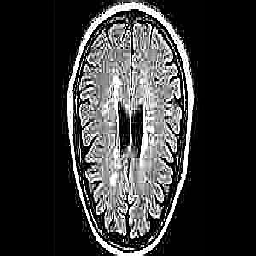

In [48]:
array_to_img(train_images[240])

In [49]:
train_labels_final[:,240]

array([0.], dtype=float32)

### Data Standardization

In [50]:
train_img_final = train_img_unrow/255
test_img_final = test_img_unrow/255

type(test_img_unrow)

numpy.ndarray

### Logistic Regression-based Neural Network

<b> Initialize b </b>

In [51]:
b = 0

<b> Initialize w </b>

In [52]:
def init_w(n):
    w = np.zeros((n,1))
    return w

In [56]:
w = init_w(256*256*3)

<b> Forward Propagation </b>

In [57]:
def propagation(w, b, x, y):
    l = x.shape[1]
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b)))                                  
    cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))    
    dw = (1/l) * np.dot(x,(y_hat - y).T)
    db = (1/l) * np.sum(y_hat - y)
    return dw, db, cost

In [58]:
dw, db, cost = propagation(w, b, train_img_final, train_labels_final)

In [59]:
print(dw)

print(db)

print(cost)

[[-0.00364706]
 [-0.00269804]
 [-0.0033451 ]
 ...
 [-0.01177647]
 [-0.01160784]
 [-0.01128235]]
-0.002
0.6931471805599454


<b> Optimization </b>

In [60]:
def optimization(w, b, x, y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        dw, db, cost = propagation(w, b, x, y)    
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs and print them every 50 iterations
        if i % 50 == 0:
            costs.append(cost)
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return w, b, costs

In [61]:
w, b, costs = optimization(w, b, train_img_final, train_labels_final, 
                           num_iterations= 151, learning_rate = 0.0001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 50: 0.521153
Cost after iteration 100: 0.454500
Cost after iteration 150: 0.411769


<b> Label Predictions </b>

In [62]:
def prediction(w, b, x):
    l = x.shape[1]
    y_prediction = np.zeros((1, l))
    w = w.reshape(x.shape[0], 1)
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b))) 
    p = y_hat
    
    for i in range(y_hat.shape[1]):
        if (y_hat[0,i] > 0.5): 
            y_prediction[0, i] = 1
        else:
            y_prediction[0, i] = 0
    return y_prediction

In [63]:
w = np.array([[0.035], [0.123], [0.217]])
b = 0.2
x = np.array([[0.2, 0.4, -1.2, -2], 
              [1, -2., 0.1, -1], 
              [0.2, 0.4, -1.2, -2]])

prediction(w, b, x)

array([[1., 1., 0., 0.]])

<b> Overall Model </b>

In [64]:
def model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    b = 0
    w = init_w(np.shape(x_train)[0]) 

    # Gradient descent (≈ 1 line of code)
    w, b, costs = optimization(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)
    
    y_pred_test = prediction(w, b, x_test)
    y_pred_train = prediction(w, b, x_train)

    # Print train/test errors
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    output = {'costs': costs, 
              'y_pred_test': y_pred_test,  
              'y_pred_train' : y_pred_train,  
              'w' : w, 
              'b' : b, 
              'learning_rate' : learning_rate, 
              'num_iterations': num_iterations}
    
    return output

In [65]:
output = model(train_img_final, train_labels_final, test_img_final, test_labels_final,
               num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147


C:\Users\msavg\AppData\Local\Temp\ipykernel_1844\3547166593.py:4: RuntimeWarning: divide by zero encountered in log
  cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))
C:\Users\msavg\AppData\Local\Temp\ipykernel_1844\3547166593.py:4: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))


Cost after iteration 50: 1.428492
Cost after iteration 100: 0.232415
Cost after iteration 150: 0.082094
Cost after iteration 200: 0.037336
Cost after iteration 250: 0.024759
Cost after iteration 300: 0.017805
Cost after iteration 350: 0.013923
Cost after iteration 400: 0.011646
Cost after iteration 450: 0.010154
Cost after iteration 500: 0.009082
Cost after iteration 550: 0.008264
Cost after iteration 600: 0.007614
Cost after iteration 650: 0.007081
Cost after iteration 700: 0.006633
Cost after iteration 750: 0.006250
Cost after iteration 800: 0.005917
Cost after iteration 850: 0.005625
Cost after iteration 900: 0.005366
Cost after iteration 950: 0.005134
Cost after iteration 1000: 0.004925
Cost after iteration 1050: 0.004735
Cost after iteration 1100: 0.004562
Cost after iteration 1150: 0.004403
Cost after iteration 1200: 0.004256
Cost after iteration 1250: 0.004121
Cost after iteration 1300: 0.003995
Cost after iteration 1350: 0.003877
Cost after iteration 1400: 0.003768
Cost after i